---
# Primeira Sprint
---
<font color=blue, size="4">  __Importando bibliotecas__

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import confusion_matrix

---
<font color=blue, size="4">  __Leitura e visualização dados__
    
---

In [3]:
dataset = pd.DataFrame(pd.read_csv('creditcard.csv'))

#Checando as features do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

---
<font color=blue, size="4">  __Limpeza dos dados__
    
---

In [4]:
dataset.head(3)
dataset = dataset.sort_values(by = 'Class', ascending = False)
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42635,41181.0,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
135718,81372.0,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
10568,17520.0,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1
215132,139951.0,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
144104,85864.0,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,...,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95068,65155.0,1.507824,-0.457180,-0.214364,-0.793170,-0.207350,-0.058773,-0.394748,-0.195061,-0.615343,...,-0.025890,0.110197,-0.290440,-0.925287,0.918804,-0.063481,0.012964,-0.003206,7.84,0
95069,65155.0,-0.503377,0.878358,1.541229,0.143517,-1.010869,-0.530841,-0.350205,0.469048,0.075054,...,0.229615,0.500844,0.061530,0.394785,-0.599597,0.232721,-0.194458,-0.016911,12.00,0
95070,65155.0,1.074335,-0.085551,0.747311,1.395833,-0.553542,0.186857,-0.371126,0.297574,0.510277,...,-0.002702,0.143968,-0.046115,0.196057,0.514512,-0.293995,0.041147,0.009356,14.00,0
95071,65156.0,1.134910,0.224390,0.779909,0.936986,-0.280685,0.038914,-0.239523,0.157356,-0.131908,...,-0.111060,-0.296201,0.128768,-0.021375,0.211048,-0.611278,0.053280,0.020996,0.12,0


In [5]:
d = dataset[['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']].iloc[0:1000, :]
d

,V3,V4,V9,V10,V11,V12,V14,V16,V17,Class
42635,-8.451410,8.174825,-6.557760,-11.519861,6.455828,-13.380222,-13.026864,-13.251542,-22.883999,1
135718,-0.945149,3.853433,-2.294535,-1.886176,1.904284,-4.002414,-2.801915,-2.348740,-6.426734,1
10568,-15.960728,10.296603,-5.667376,-11.627194,11.027059,-16.388054,-17.230202,-10.122392,-13.639209,1
215132,-5.877289,2.201884,-1.899987,-6.428231,4.229154,-5.292314,-7.672250,-4.307060,-5.701174,1
144104,-5.660999,3.891160,-2.848923,-5.995676,4.221304,-6.119667,-8.149322,-5.375283,-9.315001,1
...,...,...,...,...,...,...,...,...,...,...
190168,-0.663999,-1.358076,-1.616948,0.249794,-1.344575,-0.700191,0.121584,0.730110,0.361256,0
190169,-0.026988,0.314395,1.219242,0.166873,0.423612,0.592035,-0.001920,0.995477,-0.988660,0
189872,-3.635841,-0.664629,-2.269671,1.237212,-1.009134,-0.820385,0.466756,-1.277454,0.774073,0
189862,-2.761199,1.121523,-0.087835,0.386429,-1.562929,-0.710502,1.120762,-0.667541,-0.315026,0


---
<font color=blue, size="4">  __Modelagem SVM (Support Vector Machine)__
    
---

In [18]:
#Criando uma seed para mantermos um padrão nos dataset de treino e teste
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [19]:
#Sepanrando o dataset apenas com as features necessária para a modelagem
X = d.iloc[:, 0:9]
y = d.iloc[:, 9]

In [25]:
#Separando as bases de dados para teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

#Aplicando o modelo SVM (Support Vector Machine)
model = svm.SVC(kernel = 'linear', gamma = 'scale') #Kernel

#Dando fit no modelo SVM usando o dataset de treino
model.fit(X_train, y_train)

#Criando a lista de predições do modelo
predict = model.predict(X_test)

In [26]:
#Testando o score do modelo
print("Score do modelo via sklearn: {0}%".format(model.score(X_test, y_test) * 100))

#Resultados
print("F1_score do modelo SVM foi {0}%".format(f1_score(y_test, predict) * 100))
print("Recall_score do modelo SVM foi {0}%".format(recall_score(y_test, predict) * 100))

Score do modelo via sklearn: 96.0%
F1_score do modelo SVM foi 95.50561797752808%
Recall_score do modelo SVM foi 91.39784946236558%


In [27]:
#Matriz de confusão para verificação de falsos negativos e etc...
cm = confusion_matrix(y_test, predict)
print("Dos verdadeiros negativos acertamos: {0}".format(cm[0][0]))
print("Dos falsos positivos erramos: {0}".format(cm[0][1]))
print("Dos falsos negativos erramos: {0}".format(cm[1][0]))
print("Dos verdadeiros positivos acertamos: {0}".format(cm[1][1]))

Dos verdadeiros negativos acertamos: 107
Dos falsos positivos erramos: 0
Dos falsos negativos erramos: 8
Dos verdadeiros positivos acertamos: 85


---
<font color=blue, size="4">  __Visualização do modelo para 2 features__
    
---

As visualizações a seguir são apenas para melhor entendimento do modelo Support Vector Machine. Para que seja possível plotar um gráfico de segregação das fraudes, é necessário que o dataset tenha apenas 2 features com isso, em muitos casos, acabamos por perder qualidade no modelo.

In [31]:
#Essa função calcula os limites do dataset e faz uma meshgrid para aplicarmos ao plot
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

#Essa função calcula o contorno da predição para que a segregação das fraudes seja feita, além disso, ela faz um reshape
#na predição baseado no meshgrid antes criado.
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#Essa função faz o plot em si. Temos um plot de contorno e um scatter que, juntos, demonstram a posição dos casos analizados
#pelo modelo SVM em relação as suas features e a divisão das fraudes e não fraudes.
def make_plot(xlabel, ylabel):
    fig, ax = plt.subplots()
    title = ('Segregação das fraudes via Support Vector Machine')
    X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.legend()
    plt.show()

In [32]:
#Lista do nome das colunas para usarmos como label em x e y nos plots
col = list(d.columns)
col

['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']

No handles with labels found to put in legend.


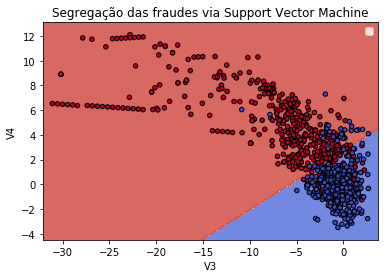

No handles with labels found to put in legend.


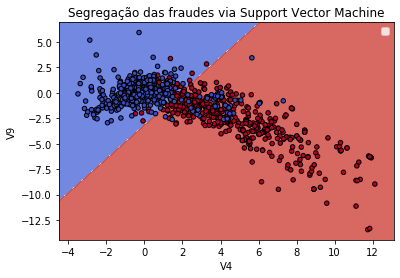

No handles with labels found to put in legend.


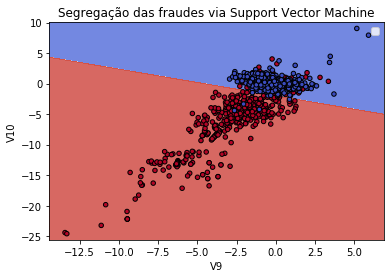

No handles with labels found to put in legend.


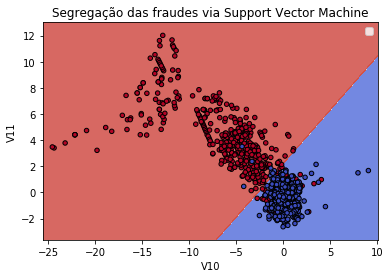

No handles with labels found to put in legend.


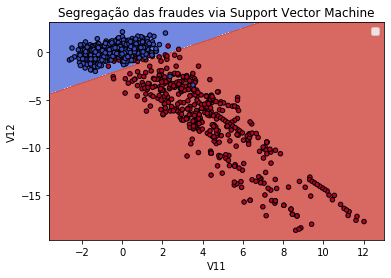

No handles with labels found to put in legend.


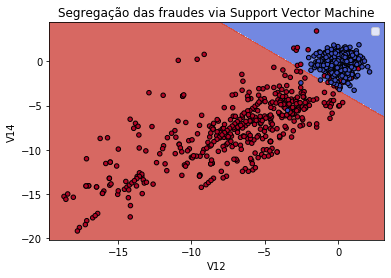

No handles with labels found to put in legend.


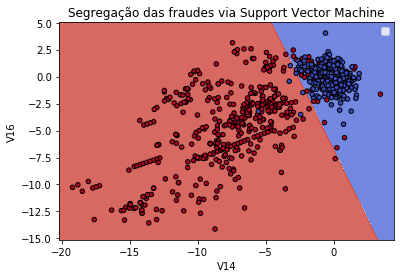

In [33]:
for i in range(0, 7):
    #Separando o dataset em duplas de features
    X = d.iloc[:, i: i + 2]
    #Separando as bases de dados para teste e treino
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

    #Aplicando o modelo SVM (Support Vector Machine)
    model = svm.SVC(kernel = 'linear', gamma = 'scale') #Kernel

    #Dando fit no modelo SVM usando o dataset de treino
    model.fit(X_train, y_train)
    
    #Plotando o gráfico de segregação
    make_plot(col[i], col[i + 1])